# **Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **STEP 1: Loading necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## **STEP 2: Loading Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/urban_energy_consumption_dataset.csv')
# Displaying first 5 rows
df.head()

,Household_ID,Energy_Consumption_kWh,Number_of_Residents,Income_Level,Appliance_Usage_Percentage,Season
0,HH_001,1049.01,2,Low,42.91,Spring
1,HH_002,858.52,2,Low,52.96,Spring
2,HH_003,1094.31,1,Medium,79.00,Spring
3,HH_004,1356.91,1,Medium,54.63,Autumn
4,HH_005,829.75,1,High,46.44,Autumn


# **Data Cleaning**

## **STEP 3: Displaying Dataset Shape, Columns, Data Types**

In [ ]:
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns)
print("\nData Types:\n")
print(df.dtypes)


Shape of dataset: (200, 6)

Columns:
 Index(['Household_ID', 'Energy_Consumption_kWh', 'Number_of_Residents',
       'Income_Level', 'Appliance_Usage_Percentage', 'Season'],
      dtype='object')

Data Types:

Household_ID                   object
Energy_Consumption_kWh        float64
Number_of_Residents             int64
Income_Level                   object
Appliance_Usage_Percentage    float64
Season                         object
dtype: object


## **STEP 4: Checking Missing Values and duplicate values**

In [ ]:
missing_values = df.isnull().sum()
print("Missing Values in each column:\n", missing_values)
duplicates = df.duplicated().sum()
print("Duplicate rows:", duplicates)
# Drop duplicates
df = df.drop_duplicates()

Missing Values in each column:
 Household_ID                  0
Energy_Consumption_kWh        0
Number_of_Residents           0
Income_Level                  0
Appliance_Usage_Percentage    0
Season                        0
dtype: int64
Duplicate rows: 0


## **STEP 5: Validate Categorical Values**

In [ ]:
print("Unique Income Levels:", df['Income_Level'].unique())
print("Unique Seasons:", df['Season'].unique())

Unique Income Levels: ['Low' 'Medium' 'High']
Unique Seasons: ['Spring' 'Autumn' 'Winter' 'Summer']


## **STEP 6: Summary Statistics**

In [ ]:
df.describe()

,Energy_Consumption_kWh,Number_of_Residents,Appliance_Usage_Percentage
count,200.000000,200.000000,200.000000
mean,888.198500,3.960000,52.889400
std,278.168773,1.979391,13.960231
min,200.000000,1.000000,31.000000
25%,688.457500,2.000000,39.962500
50%,898.740000,4.000000,51.425000
75%,1050.252500,6.000000,64.807500
max,1716.050000,7.000000,79.500000


# **Step 7: Checking Outliers**

## **7.1 Energy Consumption Outlier Check**

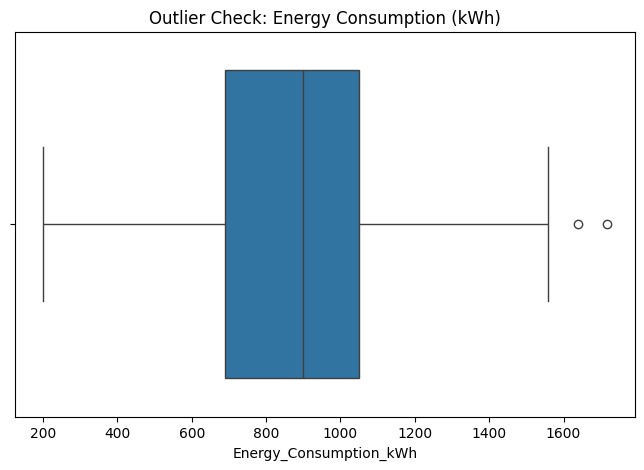

Energy Consumption Range: 200.0 to 1716.05


In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Energy_Consumption_kWh'])
plt.title("Outlier Check: Energy Consumption (kWh)")
plt.show()
print("Energy Consumption Range:", df['Energy_Consumption_kWh'].min(), "to", df['Energy_Consumption_kWh'].max())

## **7.2 Appliance Usage Percentage Outlier Check**

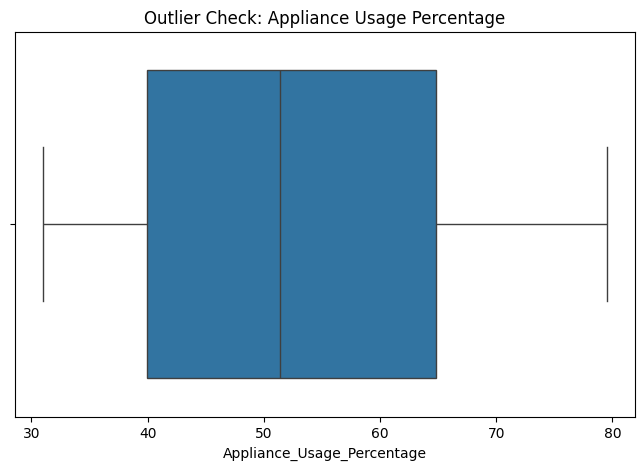

Appliance Usage Range: 31.0 to 79.5


In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Appliance_Usage_Percentage'])
plt.title("Outlier Check: Appliance Usage Percentage")
plt.show()
print("Appliance Usage Range:", df['Appliance_Usage_Percentage'].min(), "to", df['Appliance_Usage_Percentage'].max())

## **7.3 Remove Outliers**

In [ ]:
# Energy Consumption outliers remove
Q1 = df['Energy_Consumption_kWh'].quantile(0.25)
Q3 = df['Energy_Consumption_kWh'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df['Energy_Consumption_kWh'] >= lower_bound) & (df['Energy_Consumption_kWh'] <= upper_bound)]

# Printing number of rows remaining after outliers removed
print("Rows after Energy Consumption outlier removal:", df_cleaned.shape[0])

Rows after Energy Consumption outlier removal: 198


# **Step 8: Normalize Data**

In [ ]:
scaler = MinMaxScaler()

df['Energy_Consumption_kWh_Normalized'] = scaler.fit_transform(df[['Energy_Consumption_kWh']])
df['Appliance_Usage_Percentage_Normalized'] = scaler.fit_transform(df[['Appliance_Usage_Percentage']])

df.head()

,Household_ID,Energy_Consumption_kWh,Number_of_Residents,Income_Level,Appliance_Usage_Percentage,Season,Energy_Consumption_kWh_Normalized,Appliance_Usage_Percentage_Normalized
0,HH_001,1049.01,2,Low,42.91,Spring,0.560015,0.245567
1,HH_002,858.52,2,Low,52.96,Spring,0.434366,0.452784
2,HH_003,1094.31,1,Medium,79.00,Spring,0.589895,0.989691
3,HH_004,1356.91,1,Medium,54.63,Autumn,0.763108,0.487216
4,HH_005,829.75,1,High,46.44,Autumn,0.415389,0.318351


# **Saving cleaned Dataset for EDA**

In [ ]:
# df_cleaned.to_csv('/content/urban_energy_consumption_cleaned.csv', index=False)

In [ ]:
df_cleaned.head()

,Household_ID,Energy_Consumption_kWh,Number_of_Residents,Income_Level,Appliance_Usage_Percentage,Season
0,HH_001,1049.01,2,Low,42.91,Spring
1,HH_002,858.52,2,Low,52.96,Spring
2,HH_003,1094.31,1,Medium,79.00,Spring
3,HH_004,1356.91,1,Medium,54.63,Autumn
4,HH_005,829.75,1,High,46.44,Autumn


# **Exploratory Data Analysis**

# **Overall Dataset Summary**

In [ ]:
df_cleaned.info()
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Household_ID                198 non-null    object 
 1   Energy_Consumption_kWh      198 non-null    float64
 2   Number_of_Residents         198 non-null    int64  
 3   Income_Level                198 non-null    object 
 4   Appliance_Usage_Percentage  198 non-null    float64
 5   Season                      198 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 10.8+ KB


,Household_ID,Energy_Consumption_kWh,Number_of_Residents,Income_Level,Appliance_Usage_Percentage,Season
0,HH_001,1049.01,2,Low,42.91,Spring
1,HH_002,858.52,2,Low,52.96,Spring
2,HH_003,1094.31,1,Medium,79.00,Spring
3,HH_004,1356.91,1,Medium,54.63,Autumn
4,HH_005,829.75,1,High,46.44,Autumn


## **Step 9: Summary Statistics of cleaned data**

In [ ]:
df_cleaned.describe()
# Frequency count for categorical variables
print("Income Level Distribution:\n", df_cleaned['Income_Level'].value_counts())
print("\nSeason Distribution:\n", df_cleaned['Season'].value_counts())

Income Level Distribution:
 Income_Level
Medium    75
Low       68
High      55
Name: count, dtype: int64

Season Distribution:
 Season
Spring    53
Winter    51
Summer    49
Autumn    45
Name: count, dtype: int64


## **Step 10: Exploring High Energy Consumers Group**

In [ ]:
# High consumption threshold at 75th percentile
threshold = df_cleaned['Energy_Consumption_kWh'].quantile(0.75)

# Creating new column for grouping
df_cleaned['Consumption_Group'] = df_cleaned['Energy_Consumption_kWh'].apply(lambda x: 'High' if x >= threshold else 'Normal')

# Distribution count
df_cleaned['Consumption_Group'].value_counts()

<ipython-input-37-4048781400>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Consumption_Group'] = df_cleaned['Energy_Consumption_kWh'].apply(lambda x: 'High' if x >= threshold else 'Normal')


,count
Consumption_Group,
Normal,148
High,50


# **Step 11: Comparing Energy Consumption Across Demographics**

### **11.1 :  Income Level vs Energy Consumption**

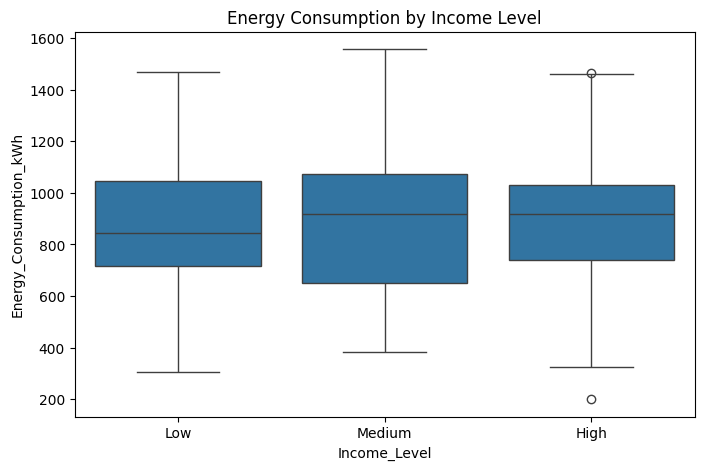

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Income_Level', y='Energy_Consumption_kWh', data=df_cleaned)
plt.title("Energy Consumption by Income Level")
plt.show()

### **11.2 :  Season vs Energy Consumption**

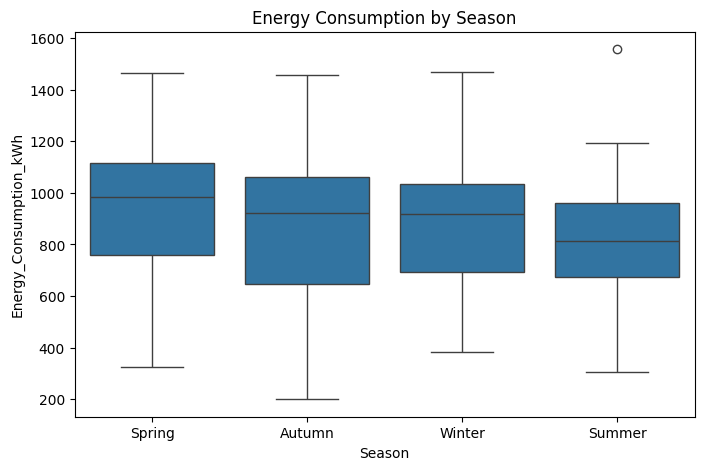

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Season', y='Energy_Consumption_kWh', data=df_cleaned)
plt.title("Energy Consumption by Season")
plt.show()

### **11.3 : Number of Residents vs Energy Consumption**

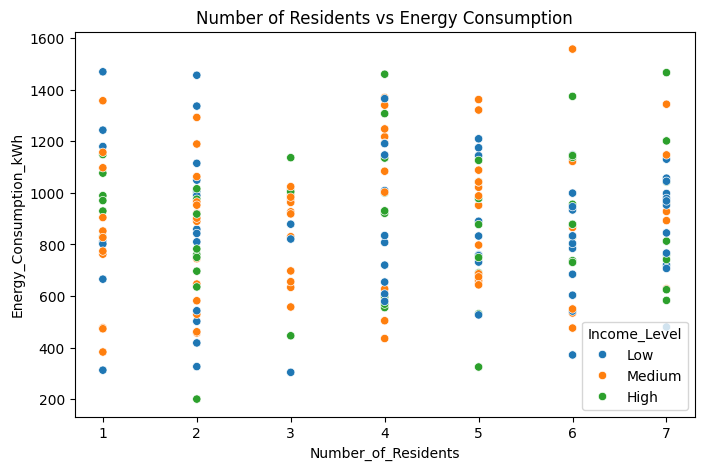

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Number_of_Residents', y='Energy_Consumption_kWh', hue='Income_Level', data=df_cleaned)
plt.title("Number of Residents vs Energy Consumption")
plt.show()

### **11.4: Seasonal consumption analysis**

<ipython-input-41-3837060347>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Season', y='Energy_Consumption_kWh', data=df_cleaned, estimator='mean', ci=None)


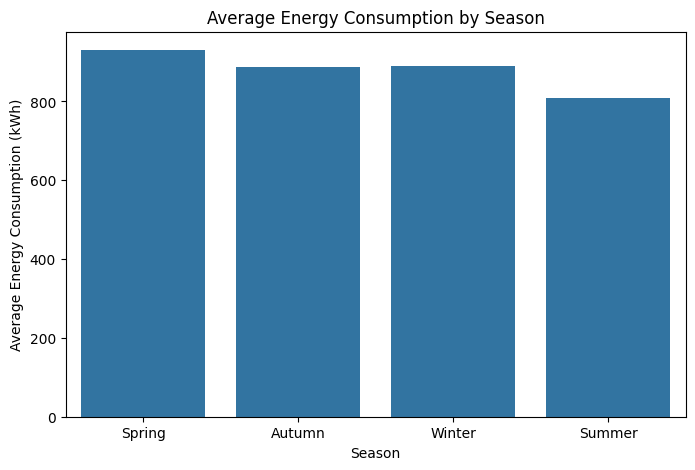

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Season', y='Energy_Consumption_kWh', data=df_cleaned, estimator='mean', ci=None)
plt.title("Average Energy Consumption by Season")
plt.ylabel("Average Energy Consumption (kWh)")
plt.show()

## **11.5: Correlation Heatmap**

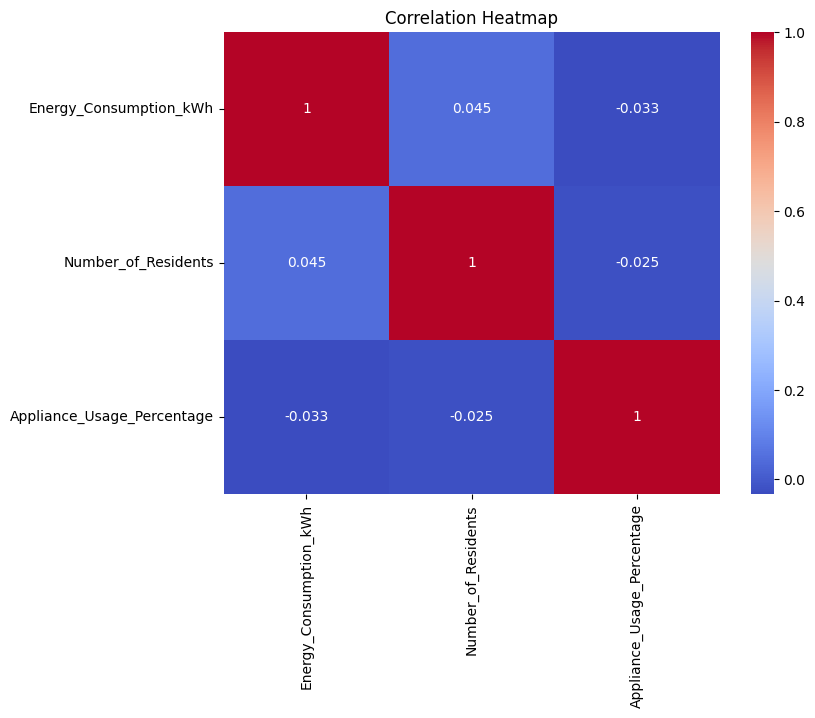

In [ ]:
plt.figure(figsize=(8,6))
corr = df_cleaned[['Energy_Consumption_kWh', 'Number_of_Residents', 'Appliance_Usage_Percentage']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# **Presenting the Findings using two visualization technique**

## **Step 12: Visualization 1 (Histogram for Energy Consumption)**

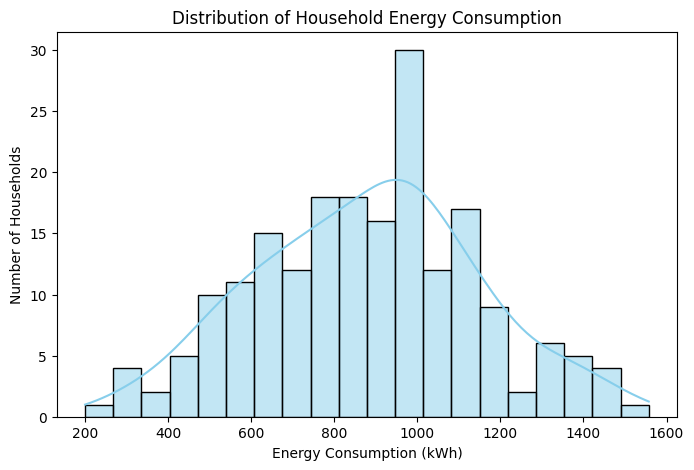

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['Energy_Consumption_kWh'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Household Energy Consumption")
plt.xlabel("Energy Consumption (kWh)")
plt.ylabel("Number of Households")
plt.show()

## **Step 13: Visualization 2 (Bar Chart for Average Energy Consumption by Income Level)**

<ipython-input-43-1961720381>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Income_Level', y='Energy_Consumption_kWh', data=df_cleaned, estimator='mean', ci=None)


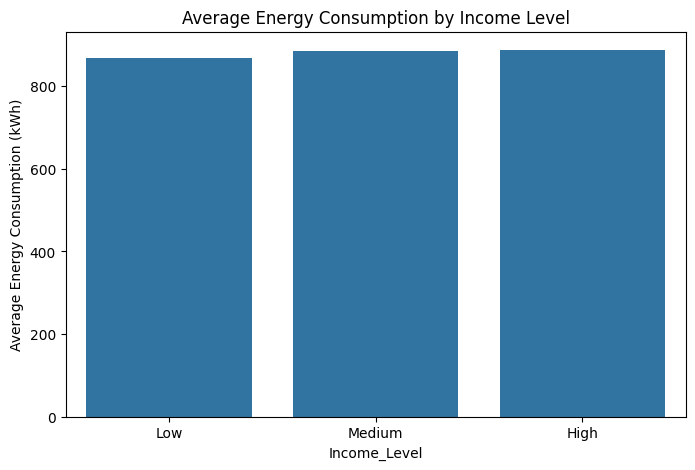

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Income_Level', y='Energy_Consumption_kWh', data=df_cleaned, estimator='mean', ci=None)
plt.title("Average Energy Consumption by Income Level")
plt.ylabel("Average Energy Consumption (kWh)")
plt.show()

# **Advanced Visualization Techniques**

## **STEP 14: Simulating Location Data**

**My dataset doesn't have real location values. so, i will simulate location-based groupings**

In [ ]:
# Simulating regions for households (North, South, East, West)
np.random.seed(42)
df_cleaned['Region'] = np.random.choice(['North', 'South', 'East', 'West'], size=len(df_cleaned))
df_cleaned.head()

<ipython-input-44-343012405>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Region'] = np.random.choice(['North', 'South', 'East', 'West'], size=len(df_cleaned))


,Household_ID,Energy_Consumption_kWh,Number_of_Residents,Income_Level,Appliance_Usage_Percentage,Season,Consumption_Group,Region
0,HH_001,1049.01,2,Low,42.91,Spring,High,East
1,HH_002,858.52,2,Low,52.96,Spring,Normal,West
2,HH_003,1094.31,1,Medium,79.00,Spring,High,North
3,HH_004,1356.91,1,Medium,54.63,Autumn,High,East
4,HH_005,829.75,1,High,46.44,Autumn,Normal,East


### **Energy Consumption Intensity by Location (Visualization 1 : Heatmap)**

<ipython-input-45-15029122>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.index, y=region_avg.values, palette="coolwarm")


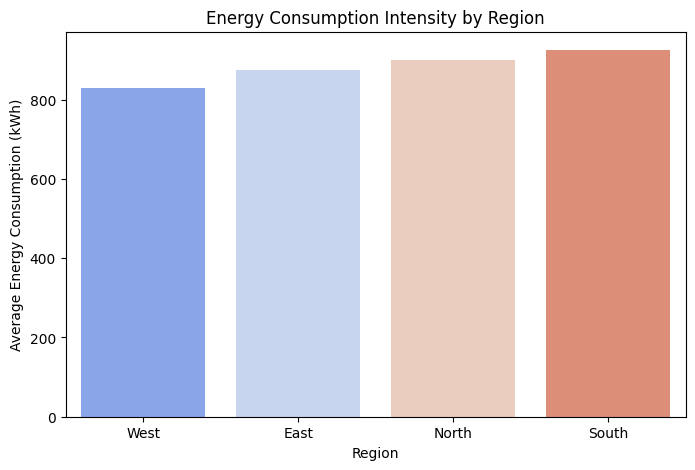

In [ ]:
region_avg = df_cleaned.groupby('Region')['Energy_Consumption_kWh'].mean().sort_values()

plt.figure(figsize=(8,5))
sns.barplot(x=region_avg.index, y=region_avg.values, palette="coolwarm")
plt.title("Energy Consumption Intensity by Region")
plt.ylabel("Average Energy Consumption (kWh)")
plt.xlabel("Region")
plt.show()

## **Income Levels vs Energy Efficiency (Visualization 2:Radial Plot)**

In [ ]:
# Calculate energy efficiency
df_cleaned['Energy_Efficiency'] = df_cleaned['Energy_Consumption_kWh'] / df_cleaned['Number_of_Residents']

# Aggregate average efficiency for each income level
efficiency_data = df_cleaned.groupby('Income_Level')['Energy_Efficiency'].mean()

# Sort to keep income levels in order Low → High
efficiency_data = efficiency_data.reindex(['Low', 'Medium', 'High'])

<ipython-input-59-4215703252>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Energy_Efficiency'] = df_cleaned['Energy_Consumption_kWh'] / df_cleaned['Number_of_Residents']


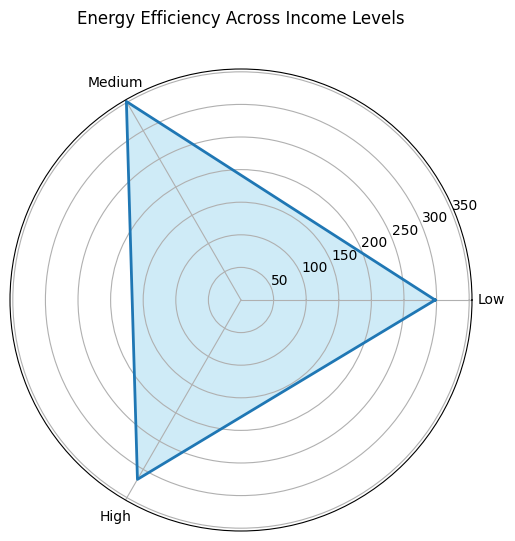

In [ ]:
# Prepare data for radar chart
labels = efficiency_data.index.tolist()
values = efficiency_data.values.tolist()
values += values[:1]  # close the circle

# Setup polar coordinates
angles = [n / float(len(labels)) * 2 * np.pi for n in range(len(labels))]
angles += angles[:1]

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1], labels)
ax.plot(angles, values, linewidth=2, linestyle='solid')
ax.fill(angles, values, 'skyblue', alpha=0.4)

plt.title("Energy Efficiency Across Income Levels", y=1.08)
plt.show()

## **Seasonal Variations by Income Level(Visualization 3: Faceted Line Plot by)**

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  func(*plot_args, **plot_kwargs)


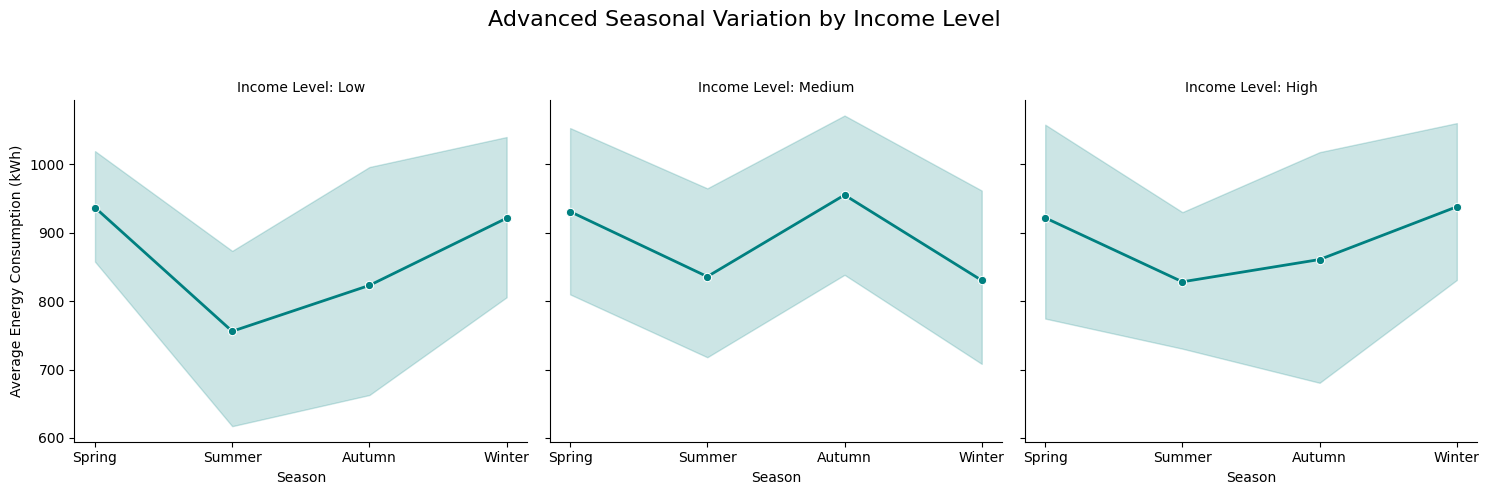

In [ ]:
# season order
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']

# Convert season column to ordered categorical type
df_cleaned['Season'] = pd.Categorical(df_cleaned['Season'], categories=season_order, ordered=True)
g = sns.FacetGrid(df_cleaned, col="Income_Level", col_order=['Low', 'Medium', 'High'], height=5, aspect=1)
g.map_dataframe(sns.lineplot, x='Season', y='Energy_Consumption_kWh', estimator='mean', ci=95, marker='o', linewidth=2, color='teal')

g.set_titles(col_template="Income Level: {col_name}")
g.set_axis_labels("Season", "Average Energy Consumption (kWh)")
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Advanced Seasonal Variation by Income Level", fontsize=16)

plt.show()